In [149]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [150]:
#initial Graph
nodes = ["A", "B", "C", "D", "F", "G", "K"]
edges = [("A", "B", 12), ("B", "C", 5), ("B", "F", 1), ("F", "G", 14), ("A", "C", 9), ("F", "K", 17), ("D", "K", 4), ("G", "B", 4), ("F", "C", 17), ("A", "K",11)]

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

# Add the reverse edges to make the graph undirected
for edge in edges:
    G.add_edge(edge[1], edge[0], weight=edge[2])

pos = nx.spring_layout(G)

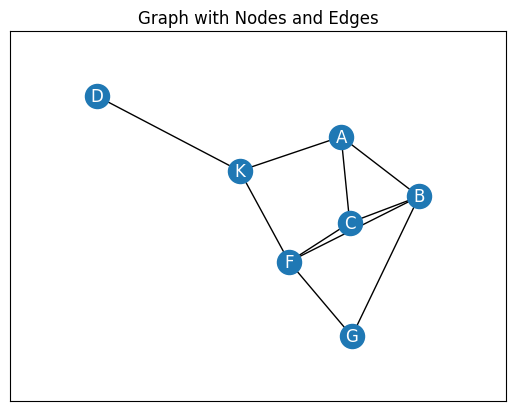

In [151]:
#showing graph
# nx.draw(G, pos, with_labels=True)
nx.draw_networkx_nodes(G, pos, nodes, node_size=300)
nx.draw_networkx_edges(G, pos, edges)
nx.draw_networkx_labels(G, pos, font_color="white")
plt.title("Graph with Nodes and Edges")
plt.margins(0.2)
plt.show()

In [152]:
#initail Q table, stats and actions

#states = nodes
state_numbers = len(G.nodes)
action_numbers = len(G.edges)
Q = np.zeros((state_numbers, action_numbers))
print(f"#states = {state_numbers}, #action = {action_numbers}.")

#states = 7, #action = 10.


In [153]:
print(G.has_edge("A", "B"))
print(G["A"]["B"]["weight"])

True
12


In [154]:
#defining Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon-greedy exploration parameter

In [155]:
#define the start state and end state
start_state = "A"
goal_state = "C"

In [156]:
print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [157]:
#calculate the reward
def calculate_reward(state, next_state, graph):
    if graph.has_edge(state, next_state):
        weight = graph[state][next_state]['weight']
        return -weight
    
    else:
        return -1000

In [158]:
# Create a list of all edges (including reverse edges)
all_edges = list(G.edges) + [(v, u) for u, v in G.edges]

In [159]:
def get_action(state, epsilon, neighbors, Q, all_edges):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random neighbor
        next_state = np.random.choice(neighbors)
        return (state, next_state)
    else:
        # Choose the neighbor with the maximum Q-value
        state_index = list(G.nodes).index(state)
        neighbor_indices = [list(G.nodes).index(n) for n in neighbors]
        neighbor_q_values = [Q[state_index][all_edges.index((state, n))] for n in neighbors]
        max_q_index = neighbor_indices[np.argmax(neighbor_q_values)]
        next_state = list(G.nodes)[max_q_index]
        return (state, next_state)

In [160]:
#every episode algorithm
def trip(start_state, goal_state, graph, Q, all_edges):
    state = start_state
    while state != goal_state:
        neighbors = list(graph.neighbors(state))
        action = get_action(state, epsilon, neighbors, Q, all_edges)
        state, next_state = action
        if next_state not in graph.nodes:
            continue  # Skip this iteration if next_state is not a valid node
        reward = calculate_reward(state, next_state, graph)
        state_index = list(G.nodes).index(state)
        next_state_index = list(G.nodes).index(next_state)
        action_index = all_edges.index((state, next_state))
        Q[state_index][action_index] += alpha * (reward + gamma * np.max(Q[next_state_index]) - Q[state_index][action_index])
        state = next_state

In [161]:
#Q-learning algorithm
num_episodes = 1000
for _ in range(num_episodes):
    trip(start_state, goal_state, G, Q, all_edges)

IndexError: index 10 is out of bounds for axis 0 with size 10

In [ ]:
def extract_policy(Q, nodes):
    policy = {}
    for i, node in enumerate(nodes):
        policy[node] = nodes[np.argmax(Q[i])]
    return policy

policy = extract_policy(Q, list(G.nodes))
print("Optimal Policy:", policy)
